# Thermal Impedance to SPICE-model
## How to read data sheet
The example MOSFET used is Nexperia PSMN3R4-30BLE
![alt text](Example_Transistor_Thermal_Impedance.png "Title")


## import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## The serie of thermal impedance exponentials

In [3]:
def model_function(t, Ri, Ti):
    return np.multiply(Ri, (1-np.exp(np.multiply(t*-1,Ti))))

def model_series(t, R1, T1, R2, T2, R3, T3, R4, T4, R5, T5, R6, T6):
    return  model_function(t, R1, T1) + model_function(t, R2, T2) + model_function(t, R3, T3) + model_function(t, R4, T4) + model_function(t, R5, T5) + model_function(t, R6, T6)

## Input data here like the blue dots in the graph above

In [4]:
x_data = [1e-6 ,5e-6 ,1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 5e-1, 1e0]
y_data = [4e-03 , 1.5e-2, 2e-2 , 4.5e-2 , 7e-2 , 1.5e-1 , 2.33e-1 , 5e-1 , 6e-1 , 8e-1 , 8e-1 , 8e-1 , 8e-1]

print("This is your x data")
print(x_data)
print("this is your y data")
print(y_data)

This is your x data
[1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0]
this is your y data
[0.004, 0.015, 0.02, 0.045, 0.07, 0.15, 0.233, 0.5, 0.6, 0.8, 0.8, 0.8, 0.8]


## Set the axes of your plot to the same as the plot in the datasheet
In the graph above its xlim 

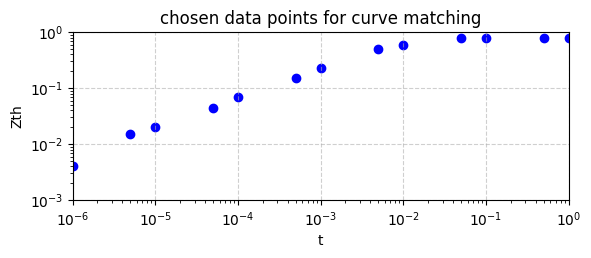

In [54]:
graph_scale_base = 10

time_scale_lowest_exponent = -6
time_scale_highest_exponent = 0

thermal_impedance_lowest_exponent = -3
thermal_impedance_highest_exponent = 0

t_lower_limit = graph_scale_base**time_scale_lowest_exponent
t_upper_limit = graph_scale_base**time_scale_highest_exponent
z_lower_limit = graph_scale_base**thermal_impedance_lowest_exponent
z_upper_limit = graph_scale_base**thermal_impedance_highest_exponent

# expand the amount of points in time(logarithmically spaced) for more elaborate graphs
x_data_expanded = np.logspace(time_scale_lowest_exponent, time_scale_highest_exponent, num=1000, base=graph_scale_base)

# create figure and initiate subplot
fig = plt.figure()
ax = fig.add_subplot(2,1,1)

# plot data
line = ax.scatter(x_data, y_data, label='Data', color='blue', lw=1)

# set labels
ax.set_xlabel('t')
ax.set_ylabel('Zth')
ax.set_title('chosen data points for curve matching')

# set limits
plt.xlim([t_lower_limit, t_upper_limit])
plt.ylim([z_lower_limit, z_upper_limit])

# set to logarithmic scales
ax.set_xscale('log')
ax.set_yscale('log')

# set grid lines
ax.grid(True, linestyle='--', alpha=0.6)

## Make an initial guess for the parameters resistance Ri and timeconstant Ti
To do this we can analyze the function a little bit more to understand it a little bit better

I will give you the following starting point

In [55]:
initial_guess_1 = [0.1 , 1000]

and it looks like this

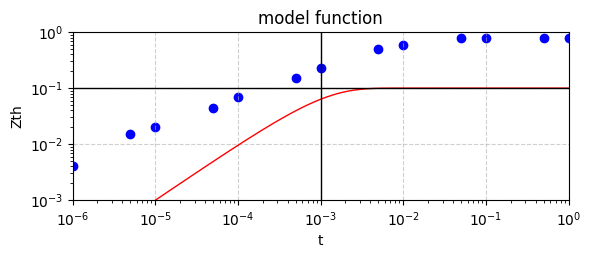

In [69]:
# create data for plotting
y_data_initial_1 = np.empty_like(x_data_expanded)

for i in range(len(x_data_expanded)):
    y_data_initial_1[i] = model_function(x_data_expanded[i]\
                                         ,initial_guess_1[0], initial_guess_1[1])

# create figure and initiate subplot
fig = plt.figure()
ax = fig.add_subplot(2,1,1)

# plot data
line = ax.plot(x_data_expanded, y_data_initial_1, label='Data', color='red', lw=1)
line = plt.vlines(1e-3, z_lower_limit ,z_upper_limit , color='black', lw=1)
line = plt.hlines(1e-1, t_lower_limit ,t_upper_limit , color='black', lw=1)
data = ax.scatter(x_data, y_data, label='Data', color='blue', lw=1)

# set labels
ax.set_xlabel('t')
ax.set_ylabel('Zth')
ax.set_title('model function')

# set limits
plt.xlim([t_lower_limit, t_upper_limit])
plt.ylim([z_lower_limit, z_upper_limit])

# set to logarithmic scales
ax.set_xscale('log')
ax.set_yscale('log')

# set grid lines
ax.grid(True, linestyle='--', alpha=0.6)

The red line is you function and as time progresses the function closes in on the first value in your guess 0.1
if we look at the model function we can see that this is expected.
$$ \lim_{t \to 1} R_i \cdot (1 - e^{-t \cdot T_i}) = R_i \cdot (1 - e^{-T_i)}$$
and if we say that 1% of 1 is insignificant then
$$ ln(0.01) = -4.6 $$
then if
$$ Ti \gg 4.6 \to e^{-t \cdot T_i} \approx 0 $$
then
$$ R_i \cdot (1 - e^{-t \cdot T_i}) = R_i \cdot 1 = R_i $$
and since our initial guess was
$$ T_i = 1000 $$
as time becomes closer to 1 second this makes the function lean in to the value of
$$ R_i = 0.1 $$

If we instead make the guess even bigger the term should cancel even earlier
$$ T_i \ggg 4.6 $$

In [70]:
initial_guess_1 = [0.1 , 7000000]

it looks like this

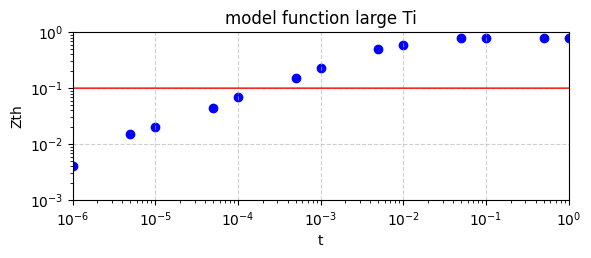

In [74]:
# create data for plotting
y_data_initial_1 = np.empty_like(x_data_expanded)

for i in range(len(x_data_expanded)):
    y_data_initial_1[i] = model_function(x_data_expanded[i]\
                                         ,initial_guess_1[0], initial_guess_1[1])

# create figure and initiate subplot
fig = plt.figure()
ax = fig.add_subplot(2,1,1)

# plot data
line = ax.plot(x_data_expanded, y_data_initial_1, label='Data', color='red', lw=1)
data = ax.scatter(x_data, y_data, label='Data', color='blue', lw=1)

# set labels
ax.set_xlabel('t')
ax.set_ylabel('Zth')
ax.set_title('model function large Ti')

# set limits
plt.xlim([t_lower_limit, t_upper_limit])
plt.ylim([z_lower_limit, z_upper_limit])

# set to logarithmic scales
ax.set_xscale('log')
ax.set_yscale('log')

# set grid lines
ax.grid(True, linestyle='--', alpha=0.6)

and if we make it smaller and equal the breakpoint we defined
$$ T_i = 4.6 $$

In [79]:
initial_guess_1 = [0.1 , 4.6]

it looks like this

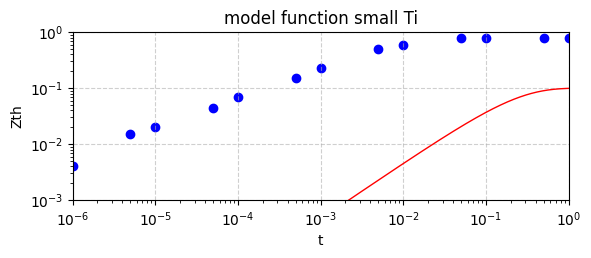

In [80]:
# create data for plotting
y_data_initial_1 = np.empty_like(x_data_expanded)

for i in range(len(x_data_expanded)):
    y_data_initial_1[i] = model_function(x_data_expanded[i]\
                                         ,initial_guess_1[0], initial_guess_1[1])

# create figure and initiate subplot
fig = plt.figure()
ax = fig.add_subplot(2,1,1)

# plot data
line = ax.plot(x_data_expanded, y_data_initial_1, label='Data', color='red', lw=1)
data = ax.scatter(x_data, y_data, label='Data', color='blue', lw=1)

# set labels
ax.set_xlabel('t')
ax.set_ylabel('Zth')
ax.set_title('model function small Ti')

# set limits
plt.xlim([t_lower_limit, t_upper_limit])
plt.ylim([z_lower_limit, z_upper_limit])

# set to logarithmic scales
ax.set_xscale('log')
ax.set_yscale('log')

# set grid lines
ax.grid(True, linestyle='--', alpha=0.6)

This makes it home in to $ R_i = 0.1$ at 1 second 

If we change $ R_i $ we move the point of equilibrium up and down like this

In [45]:
initial_guess_1 = [0.1 , 4.6]
initial_guess_2 = [0.01 , 4.6]
initial_guess_3 = [1 , 4.6]

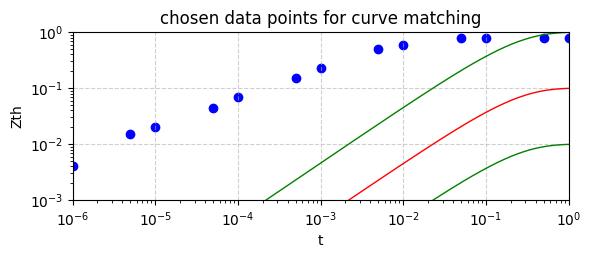

In [46]:
# create data for plotting
y_data_initial_1 = np.empty_like(x_data_expanded)
y_data_initial_2 = np.empty_like(x_data_expanded)
y_data_initial_3 = np.empty_like(x_data_expanded)

for i in range(len(x_data_expanded)):
    y_data_initial_1[i] = model_function(x_data_expanded[i]\
                                         ,initial_guess_1[0], initial_guess_1[1])

    y_data_initial_2[i] = model_function(x_data_expanded[i]\
                                         ,initial_guess_2[0], initial_guess_2[1])

    y_data_initial_3[i] = model_function(x_data_expanded[i]\
                                         ,initial_guess_3[0], initial_guess_3[1])

# create figure and initiate subplot
fig = plt.figure()
ax = fig.add_subplot(2,1,1)

# plot data
line = ax.plot(x_data_expanded, y_data_initial_1, label='Data', color='red', lw=1)
line = ax.plot(x_data_expanded, y_data_initial_2, label='Data', color='green', lw=1)
line = ax.plot(x_data_expanded, y_data_initial_3, label='Data', color='green', lw=1)
data = ax.scatter(x_data, y_data, label='Data', color='blue', lw=1)

# set labels
ax.set_xlabel('t')
ax.set_ylabel('Zth')
ax.set_title('chosen data points for curve matching')

# set limits
plt.xlim([t_lower_limit, t_upper_limit])
plt.ylim([z_lower_limit, z_upper_limit])

# set to logarithmic scales
ax.set_xscale('log')
ax.set_yscale('log')

# set grid lines
ax.grid(True, linestyle='--', alpha=0.6)

As you see the form doesnt change with $ R_i $ only the point of equilibrium

## now to the guessing of the whole chain of 6 pairs
We know that the final pont should coincide with the last datapoint and we assume the curve flattens at that point therefore 
the $ \Sigma_{i=1}^n R_i = end value = 0.8$ and since the function is displayed logarithmically and that since it makes most sense
we distribute the R values logarithmically between the first value 0.004 and the end value 0.8.

which is $ 4*10^{-3} $ and 0.8 is $ 8 * 10^{-1} $
first is 4*10^{-3}

In [47]:
n = 6
distribution = np.empty(n)
val_max = 0.8
val_min = 0.004

for i in range(n):
    distribution[i] = 0.004 * np.power((val_max/val_min), (i/(n-1)) )

print(distribution)
print(np.sum(distribution))

[0.004      0.0115416  0.03330213 0.09608995 0.27725794 0.8       ]
1.222191619523906


now since the sum is wrong we normalize the array to the max value of 0.8

In [48]:
normalized_distribution = np.empty_like(distribution)

for i in range(n):
    normalized_distribution[i] = distribution[i] * val_max / np.sum(distribution)

print(normalized_distribution)
print(np.sum(normalized_distribution))

[0.00261825 0.00755469 0.0217983  0.06289682 0.18148247 0.52364948]
0.7999999999999999


We put these in our initial guess for the function with the time constants to the minimum of $ T_i = 4.6 $ as mentioned above

In [58]:
initial_guess = [ normalized_distribution[0] , 4.6\
                 ,normalized_distribution[1] , 4.6\
                 ,normalized_distribution[2] , 4.6\
                 ,normalized_distribution[3] , 4.6\
                 ,normalized_distribution[4] , 4.6\
                 ,normalized_distribution[5] , 4.6]
print(initial_guess)

[np.float64(0.002618247375355537), 4.6, np.float64(0.007554690484134484), 4.6, np.float64(0.021798302501237887), 4.6, np.float64(0.06289681793494574), 4.6, np.float64(0.18148246663321882), 4.6, np.float64(0.5236494750711075), 4.6]


We now plot and see how we did. Green is the sum of the 6 functions.

We can see that the function is rapidly declining and not hitting any of our goals.

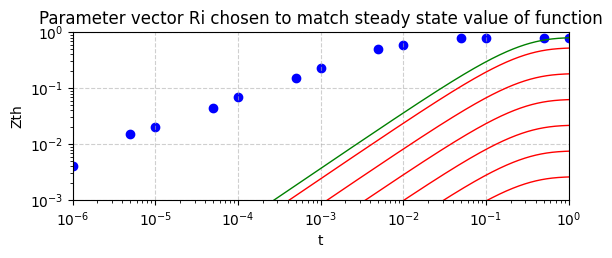

In [59]:
y_data_initial = np.empty_like(x_data_expanded)
y_data_initial_1 = np.empty_like(x_data_expanded)
y_data_initial_2 = np.empty_like(x_data_expanded)
y_data_initial_3 = np.empty_like(x_data_expanded)
y_data_initial_4 = np.empty_like(x_data_expanded)
y_data_initial_5 = np.empty_like(x_data_expanded)
y_data_initial_6 = np.empty_like(x_data_expanded)

for i in range(len(x_data_expanded)):
    y_data_initial[i] = model_series(x_data_expanded[i]\
                                     ,initial_guess[0], initial_guess[1]\
                                     ,initial_guess[2], initial_guess[3]\
                                     ,initial_guess[4], initial_guess[5]\
                                     ,initial_guess[6], initial_guess[7]\
                                     ,initial_guess[8], initial_guess[9]\
                                     ,initial_guess[10],initial_guess[11])
    y_data_initial_1[i] = model_function(x_data_expanded[i]\
                                         ,initial_guess[0], initial_guess[1])

    y_data_initial_2[i] = model_function(x_data_expanded[i]\
                                         ,initial_guess[2], initial_guess[3])

    y_data_initial_3[i] = model_function(x_data_expanded[i]\
                                         ,initial_guess[4], initial_guess[5])

    y_data_initial_4[i] = model_function(x_data_expanded[i]\
                                         ,initial_guess[6], initial_guess[7])
    
    y_data_initial_5[i] = model_function(x_data_expanded[i]\
                                         ,initial_guess[8], initial_guess[9])
    
    y_data_initial_6[i] = model_function(x_data_expanded[i]\
                                         ,initial_guess[10], initial_guess[11])

# create figure and initiate subplot
fig = plt.figure()
ax = fig.add_subplot(2,1,1)

# plot data
line = ax.plot(x_data_expanded, y_data_initial, label='Data', color='green', lw=1)
line = ax.plot(x_data_expanded, y_data_initial_1, label='Data', color='red', lw=1)
line = ax.plot(x_data_expanded, y_data_initial_2, label='Data', color='red', lw=1)
line = ax.plot(x_data_expanded, y_data_initial_3, label='Data', color='red', lw=1)
line = ax.plot(x_data_expanded, y_data_initial_4, label='Data', color='red', lw=1)
line = ax.plot(x_data_expanded, y_data_initial_5, label='Data', color='red', lw=1)
line = ax.plot(x_data_expanded, y_data_initial_6, label='Data', color='red', lw=1)
data = ax.scatter(x_data, y_data, label='Data', color='blue', lw=1)

# set labels
ax.set_xlabel('t')
ax.set_ylabel('Zth')
ax.set_title('Parameter vector Ri chosen to match steady state value of function')

# set limits
plt.xlim([t_lower_limit, t_upper_limit])
plt.ylim([z_lower_limit, z_upper_limit])

# set to logarithmic scales
ax.set_xscale('log')
ax.set_yscale('log')

# set grid lines
ax.grid(True, linestyle='--', alpha=0.6)


If we do the same and distribute the time constants we know do the inverse and start at the exponent where the graph starts to tilt down at $ t = 10^{-2} \to \tau_1 = 10^{-2} $  scaling logaritmically by 1 up until $ \tau_6 = 10^{-7} $ 

In [61]:
initial_guess = [ normalized_distribution[0] , 1e7\
                 ,normalized_distribution[1] , 1e6\
                 ,normalized_distribution[2] , 1e5\
                 ,normalized_distribution[3] , 1e4\
                 ,normalized_distribution[4] , 1e3\
                 ,normalized_distribution[5] , 1e2]
print(initial_guess)

[np.float64(0.002618247375355537), 10000000.0, np.float64(0.007554690484134484), 1000000.0, np.float64(0.021798302501237887), 100000.0, np.float64(0.06289681793494574), 10000.0, np.float64(0.18148246663321882), 1000.0, np.float64(0.5236494750711075), 100.0]


We now plot and see how we did. Green is the sum of the 6 functions.

We can see that the function is rapidly declining and not hitting any of our goals.

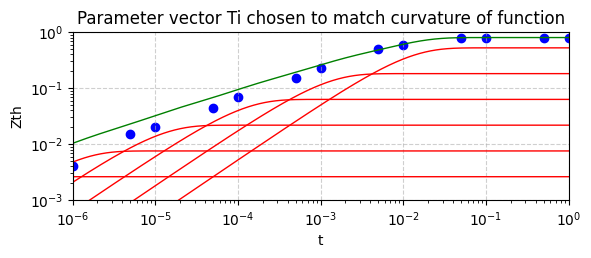

In [62]:
y_data_initial = np.empty_like(x_data_expanded)
y_data_initial_1 = np.empty_like(x_data_expanded)
y_data_initial_2 = np.empty_like(x_data_expanded)
y_data_initial_3 = np.empty_like(x_data_expanded)
y_data_initial_4 = np.empty_like(x_data_expanded)
y_data_initial_5 = np.empty_like(x_data_expanded)
y_data_initial_6 = np.empty_like(x_data_expanded)

for i in range(len(x_data_expanded)):
    y_data_initial[i] = model_series(x_data_expanded[i]\
                                     ,initial_guess[0], initial_guess[1]\
                                     ,initial_guess[2], initial_guess[3]\
                                     ,initial_guess[4], initial_guess[5]\
                                     ,initial_guess[6], initial_guess[7]\
                                     ,initial_guess[8], initial_guess[9]\
                                     ,initial_guess[10],initial_guess[11])
    y_data_initial_1[i] = model_function(x_data_expanded[i]\
                                         ,initial_guess[0], initial_guess[1])

    y_data_initial_2[i] = model_function(x_data_expanded[i]\
                                         ,initial_guess[2], initial_guess[3])

    y_data_initial_3[i] = model_function(x_data_expanded[i]\
                                         ,initial_guess[4], initial_guess[5])

    y_data_initial_4[i] = model_function(x_data_expanded[i]\
                                         ,initial_guess[6], initial_guess[7])
    
    y_data_initial_5[i] = model_function(x_data_expanded[i]\
                                         ,initial_guess[8], initial_guess[9])
    
    y_data_initial_6[i] = model_function(x_data_expanded[i]\
                                         ,initial_guess[10], initial_guess[11])

# create figure and initiate subplot
fig = plt.figure()
ax = fig.add_subplot(2,1,1)

# plot data
line = ax.plot(x_data_expanded, y_data_initial, label='Data', color='green', lw=1)
line = ax.plot(x_data_expanded, y_data_initial_1, label='Data', color='red', lw=1)
line = ax.plot(x_data_expanded, y_data_initial_2, label='Data', color='red', lw=1)
line = ax.plot(x_data_expanded, y_data_initial_3, label='Data', color='red', lw=1)
line = ax.plot(x_data_expanded, y_data_initial_4, label='Data', color='red', lw=1)
line = ax.plot(x_data_expanded, y_data_initial_5, label='Data', color='red', lw=1)
line = ax.plot(x_data_expanded, y_data_initial_6, label='Data', color='red', lw=1)
data = ax.scatter(x_data, y_data, label='Data', color='blue', lw=1)

# set labels
ax.set_xlabel('t')
ax.set_ylabel('Zth')
ax.set_title('Parameter vector Ti chosen to match curvature of function')

# set limits
plt.xlim([t_lower_limit, t_upper_limit])
plt.ylim([z_lower_limit, z_upper_limit])

# set to logarithmic scales
ax.set_xscale('log')
ax.set_yscale('log')

# set grid lines
ax.grid(True, linestyle='--', alpha=0.6)


And this is a good guess